In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gas = pd.read_csv("gas_turbines.csv")

In [4]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


<function matplotlib.pyplot.show(close=None, block=None)>

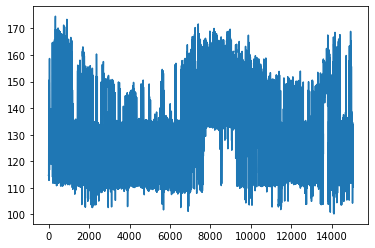

In [5]:
plt.plot(gas["TEY"])
plt.show

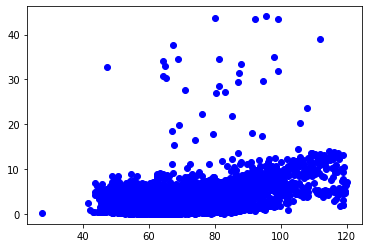

In [63]:
plt.scatter(x=gas["NOX"],y=gas["CO"],c="blue")

In [7]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
gas_norm = norm(gas)

In [11]:
gas_norm

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [12]:
gas.shape

(15039, 11)

In [13]:
cols_at_end = ['TEY']
gas_norm = gas_norm[[TEY for TEY in gas_norm if TEY not in cols_at_end] 
        + [TEY for TEY in cols_at_end if TEY in gas_norm]]

In [14]:
gas_norm

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,0.195191
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,0.195459
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,0.195325
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,0.195459
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,0.195459
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,0.153681
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,0.155965
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,0.134605
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,0.141994


In [15]:
from sklearn.model_selection import train_test_split


(array([1.3649e+04, 1.1880e+03, 1.5800e+02, 1.3000e+01, 6.0000e+00,
        2.0000e+00, 8.0000e+00, 9.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

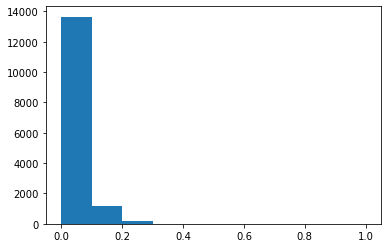

In [62]:
plt.hist(gas_norm["CO"])

(array([ 659., 2389.,  526., 3345., 4290.,  396., 1098., 1521.,  765.,
          50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

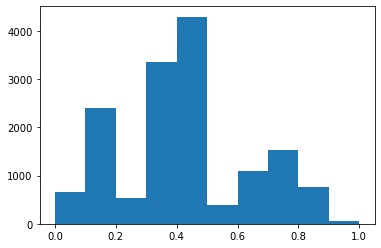

In [61]:
plt.hist(gas_norm["CDP"])

(array([   14.,    39.,    85.,   556.,   955.,   775.,   776.,   688.,
          525., 10626.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

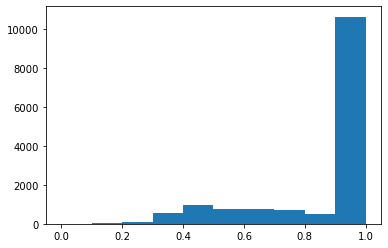

In [59]:
plt.hist(gas_norm["TAT"])

(array([5.000e+00, 1.000e+00, 5.000e+01, 1.630e+02, 3.690e+02, 2.080e+03,
        6.680e+02, 4.900e+02, 4.906e+03, 6.307e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

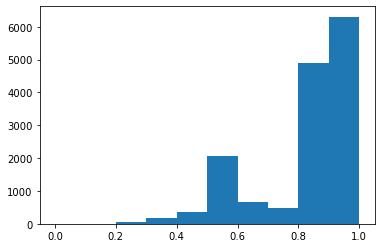

In [58]:
plt.hist(gas_norm["TIT"])

(array([1650., 1600., 1276., 4636., 2198.,  462., 1343., 1532.,  305.,
          37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

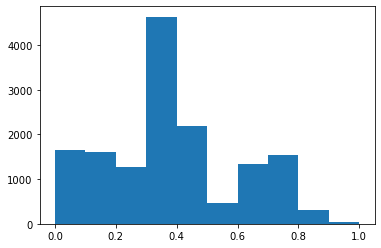

In [57]:
plt.hist(gas_norm["GTEP"])

(array([1.710e+02, 1.317e+03, 2.388e+03, 4.698e+03, 3.924e+03, 1.392e+03,
        8.300e+02, 3.050e+02, 1.000e+01, 4.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

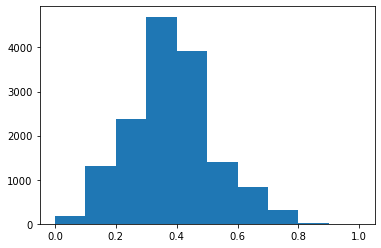

In [56]:
plt.hist(gas_norm["AFDP"])

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

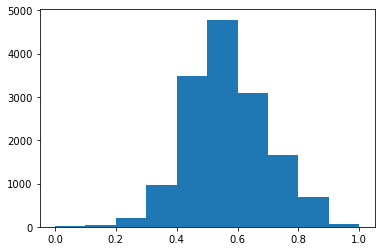

In [16]:
plt.hist(gas_norm["AP"])

(array([   5.,   21.,   54.,   91.,  140.,  285.,  358.,  506.,  569.,
         727.,  756.,  904.,  969., 1067., 1264., 1535., 1836., 1880.,
        1229.,  843.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

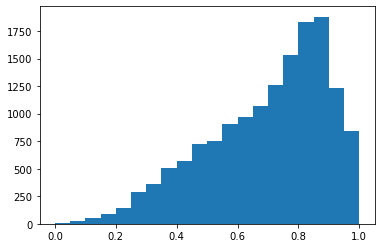

In [17]:
plt.hist(gas_norm["AH"],bins=20)

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

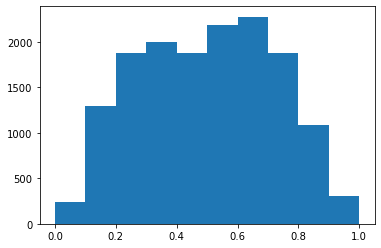

In [18]:
plt.hist(gas_norm["AT"])



(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

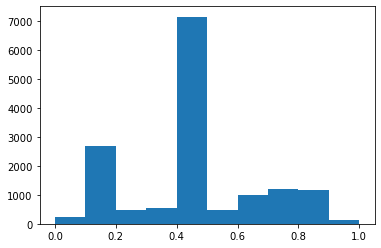

In [19]:
plt.hist(gas_norm["TEY"])

In [20]:
x = gas_norm.iloc[:,0:10]
y  =  gas_norm.iloc[:,10]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 42)

In [22]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

## tuning of batch size and epochs

In [24]:
def create_model():
    model = Sequential()
    model.add(Dense(512,input_dim=10, activation='relu',kernel_initializer="normal"))
    model.add(Dense(512,activation='relu',kernel_initializer='normal'))
    model.add(Dense(1)) # no activation (linear layer)
    model.compile(optimizer = "Adam", loss = "mse",metrics =["mae"])
    return model

In [26]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [128,256,512]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=128, epochs=10...................................
[CV 1/5; 1/9] END ...batch_size=128, epochs=10;, score=-0.000 total time=   4.5s
[CV 2/5; 1/9] START batch_size=128, epochs=10...................................
[CV 2/5; 1/9] END ...batch_size=128, epochs=10;, score=-0.000 total time=   3.5s
[CV 3/5; 1/9] START batch_size=128, epochs=10...................................
[CV 3/5; 1/9] END ...batch_size=128, epochs=10;, score=-0.000 total time=   5.1s
[CV 4/5; 1/9] START batch_size=128, epochs=10...................................
[CV 4/5; 1/9] END ...batch_size=128, epochs=10;, score=-0.000 total time=   4.4s
[CV 5/5; 1/9] START batch_size=128, epochs=10...................................
[CV 5/5; 1/9] END ...batch_size=128, epochs=10;, score=-0.000 total time=   4.1s
[CV 1/5; 2/9] START batch_size=128, epochs=50...................................
[CV 1/5; 2/9] END ...batch_size=128, epochs=50;, 

In [27]:
result=grid_result.best_params_
result

{'batch_size': 512, 'epochs': 100}

In [28]:
epochs=result["epochs"]
batch_size  = result["batch_size"]
epochs

100

In [29]:
# # Summarize the results
# print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#   print('{},{} with: {}'.format(mean, stdev, param))

In [30]:
## learning Rate and drop out rate
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(512,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(512,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mae'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = batch_size,epochs = epochs)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.000 total time=  25.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.000 total time=  23.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.000 total time=  23.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.000 total time=  22.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.000 total time=  23.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [31]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -7.108449935913085e-05, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-7.108449935913085e-05,1.224187006365372e-05 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.00013705833989661187,8.355957621858411e-05 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.0004224493633955717,0.000365462013621384 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.0004895376740023493,0.00021123557479971444 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.0015647514956071973,0.00045144120096815576 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.0053163189208135005,0.002760153010766501 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.0006926853384356946,0.00046502260264499044 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.0074734406545758246,0.001302405514077139 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.01674798671156168,0.004315879119569278 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [32]:
learning_dropout=grid_result.best_params_
learning= learning_dropout["learning_rate"]
dropout= learning_dropout["dropout_rate"]


## activation function and kernal initializer

In [33]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(512,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dense(512,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dense(1))
    
    adam = Adam(lr = learning) 
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mae'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = batch_size,epochs = epochs)

# Define the grid search parameters
activation_function = ['relu','softmax']
init = ['normal','uniform']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START activation_function=relu, init=normal.......................
[CV 1/5; 1/4] END activation_function=relu, init=normal;, score=-0.000 total time=  26.0s
[CV 2/5; 1/4] START activation_function=relu, init=normal.......................
[CV 2/5; 1/4] END activation_function=relu, init=normal;, score=-0.000 total time=  25.6s
[CV 3/5; 1/4] START activation_function=relu, init=normal.......................
[CV 3/5; 1/4] END activation_function=relu, init=normal;, score=-0.000 total time=  26.6s
[CV 4/5; 1/4] START activation_function=relu, init=normal.......................
[CV 4/5; 1/4] END activation_function=relu, init=normal;, score=-0.000 total time=  26.0s
[CV 5/5; 1/4] START activation_function=relu, init=normal.......................
[CV 5/5; 1/4] END activation_function=relu, init=normal;, score=-0.000 total time=  23.5s
[CV 1/5; 2/4] START activation_function=relu, init=uniform......................
[CV 

In [34]:
act_init= grid_result.best_params_
act = act_init["activation_function"]
kernal = act_init["init"]

In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -6.927666981937364e-05, using {'activation_function': 'relu', 'init': 'normal'}
-6.927666981937364e-05,1.1074728303997435e-05 with: {'activation_function': 'relu', 'init': 'normal'}
-7.727886986685917e-05,1.1581654663667215e-05 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.001965002832002938,8.20743414453544e-05 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.0019751162733882667,9.225486865740435e-05 with: {'activation_function': 'softmax', 'init': 'uniform'}


## no of neuron in activation layer

In [36]:
## no of neuron in activation layer
def create_model(neuron1,neuron2,kernal,act):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = kernal,activation = act))
    model.add(Dense(neuron2,input_dim = 10,kernel_initializer = kernal,activation = act))
    model.add(Dense(1))
    
    adam = Adam(lr = learning)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mae'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = batch_size,epochs = epochs,
                      kernel_initializer = kernal,activation = act)

# Define the grid search parameters

neuron1 = [32,64,512]
neuron2 = [32,64,512]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=32, neuron2=32......................................
[CV 1/5; 1/9] END ......neuron1=32, neuron2=32;, score=-0.000 total time=   6.0s
[CV 2/5; 1/9] START neuron1=32, neuron2=32......................................
[CV 2/5; 1/9] END ......neuron1=32, neuron2=32;, score=-0.000 total time=   6.2s
[CV 3/5; 1/9] START neuron1=32, neuron2=32......................................
[CV 3/5; 1/9] END ......neuron1=32, neuron2=32;, score=-0.000 total time=   3.9s
[CV 4/5; 1/9] START neuron1=32, neuron2=32......................................
[CV 4/5; 1/9] END ......neuron1=32, neuron2=32;, score=-0.000 total time=   4.5s
[CV 5/5; 1/9] START neuron1=32, neuron2=32......................................
[CV 5/5; 1/9] END ......neuron1=32, neuron2=32;, score=-0.000 total time=   4.1s
[CV 1/5; 2/9] START neuron1=32, neuron2=64......................................
[CV 1/5; 2/9] END ......neuron1=32, neuron2=64;, 

In [40]:
neuron=grid_result.best_params_
neuron1 = neuron["neuron1"]
neuron2 = neuron["neuron2"]

In [41]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -6.166208258946426e-05, using {'neuron1': 512, 'neuron2': 512}
-0.00010981594678014517,6.570492925607053e-06 with: {'neuron1': 32, 'neuron2': 32}
-9.99212876195088e-05,6.186767198806051e-06 with: {'neuron1': 32, 'neuron2': 64}
-8.64399567944929e-05,6.282649893398734e-06 with: {'neuron1': 32, 'neuron2': 512}
-9.989213576773181e-05,9.39083943047525e-06 with: {'neuron1': 64, 'neuron2': 32}
-9.699134097900242e-05,3.720282610702687e-06 with: {'neuron1': 64, 'neuron2': 64}
-8.2898058462888e-05,1.131036209481932e-05 with: {'neuron1': 64, 'neuron2': 512}
-8.173002279363573e-05,1.2279946743221406e-05 with: {'neuron1': 512, 'neuron2': 32}
-7.29754101485014e-05,8.073999527498552e-06 with: {'neuron1': 512, 'neuron2': 64}
-6.166208258946426e-05,3.3264169923675423e-06 with: {'neuron1': 512, 'neuron2': 512}


In [47]:
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score

# Defining the model
model = Sequential()
model.add(Dense(512,input_dim = 10,kernel_initializer = "normal",activation = "relu"))
model.add(Dense(512,kernel_initializer = "normal",activation = "relu"))
model.add(Dense(1))
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss = 'mse',optimizer = "Adam",metrics = ['mae'])

# Fitting the model

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)


Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 0.0469 - mae: 0.1508
Epoch 2/100
21/21 [==============================] - 0s 13ms/step - loss: 0.0017 - mae: 0.0323
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 3.4876e-04 - mae: 0.0141
Epoch 4/100
21/21 [==============================] - 0s 16ms/step - loss: 1.7961e-04 - mae: 0.0098
Epoch 5/100
21/21 [==============================] - 0s 12ms/step - loss: 1.3561e-04 - mae: 0.0086
Epoch 6/100
21/21 [==============================] - 0s 13ms/step - loss: 1.2254e-04 - mae: 0.0082
Epoch 7/100
21/21 [==============================] - 0s 12ms/step - loss: 1.0924e-04 - mae: 0.0077
Epoch 8/100
21/21 [==============================] - 0s 10ms/step - loss: 1.0353e-04 - mae: 0.0076
Epoch 9/100
21/21 [==============================] - 0s 11ms/step - loss: 9.8542e-05 - mae: 0.0074
Epoch 10/100
21/21 [==============================] - 0s 11ms/step - loss: 9.5280e-05 - mae: 0.0073
Epoch 11/100
21/2

21/21 [==============================] - 0s 10ms/step - loss: 5.8054e-05 - mae: 0.0055
Epoch 84/100
21/21 [==============================] - 0s 9ms/step - loss: 5.4096e-05 - mae: 0.0052
Epoch 85/100
21/21 [==============================] - 0s 9ms/step - loss: 5.5224e-05 - mae: 0.0053
Epoch 86/100
21/21 [==============================] - 0s 9ms/step - loss: 5.3656e-05 - mae: 0.0052
Epoch 87/100
21/21 [==============================] - 0s 9ms/step - loss: 5.6540e-05 - mae: 0.0054
Epoch 88/100
21/21 [==============================] - 0s 9ms/step - loss: 5.4231e-05 - mae: 0.0052
Epoch 89/100
21/21 [==============================] - 0s 14ms/step - loss: 5.5760e-05 - mae: 0.0054
Epoch 90/100
21/21 [==============================] - 0s 17ms/step - loss: 5.9204e-05 - mae: 0.0055
Epoch 91/100
21/21 [==============================] - 0s 17ms/step - loss: 6.5108e-05 - mae: 0.0059
Epoch 92/100
21/21 [==============================] - 0s 17ms/step - loss: 6.4131e-05 - mae: 0.0059
Epoch 93/100
21/21

In [48]:
y_predict = model.predict(x_test)

141/141 [==============================] - 0s 2ms/step


In [49]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(y_test,y_predict)

6.871827954994424e-05

In [53]:
from sklearn.metrics import r2_score

In [55]:
import numpy as np
print ( "R_squared",np.round(r2_score(y_test,y_predict)*100,2),'%')

R_squared 99.85 %


### conclusion
###### high value of R2_square and Low value "MSE " indicates we can reliable on this model predictions on TEY